**Name:** Muhammad Umer

**Email** umerhayat282@gmail.com

**Date** November 28, 2025

____

# Task
Demonstrate and evaluate the impact of SMOTE on a classification model using the 'D:\Ai_machine_learning_deep_learning_air_university_lab_islamabad\data\Salaries.csv' dataset, including data preprocessing, model training before and after SMOTE, evaluation, comparison, and visualization of results.

## Introduction to SMOTE

### Subtask:
Create a markdown cell to introduce what SMOTE (Synthetic Minority Over-sampling Technique) is, why it's used, and its importance in handling imbalanced datasets.


## Introduction to SMOTE

### What is SMOTE?
SMOTE (Synthetic Minority Over-sampling Technique) is an oversampling technique used in machine learning to address imbalanced datasets. It works by creating synthetic samples from the minority class, rather than simply duplicating existing ones. This helps to increase the number of instances in the minority class, making the dataset more balanced.

### Why is SMOTE Used?
SMOTE is primarily used to mitigate the challenges posed by imbalanced datasets. In many real-world scenarios, the number of observations belonging to one class (the minority class) is significantly lower than those belonging to other classes (the majority class). When trained on such datasets, classification models tend to be biased towards the majority class, leading to poor predictive performance, especially for the minority class, which is often the class of greater interest (e.g., fraud detection, disease diagnosis).

### Importance in Handling Imbalanced Datasets
The importance of SMOTE lies in its ability to improve the generalization and predictive power of classification models on imbalanced data. By synthetically generating new data points for the minority class, SMOTE helps to:
1. **Reduce Bias**: It prevents models from being overly biased towards the majority class.
2. **Improve Recall/Sensitivity**: Models can better identify instances of the minority class, which is crucial in applications where missing a minority class instance has high costs.
3. **Enhance Model Performance**: It leads to more robust and accurate classification models, as the learning algorithm has more diverse information from the minority class to learn from.

## Load and Inspect Data

### Subtask:
Load the 'D:\Ai_machine_learning_deep_learning_air_university_lab_islamabad\data\Salaries.csv' dataset into a pandas DataFrame. Display the first few rows, check its information (data types, non-null counts), and describe basic statistics to understand the data structure and identify potential issues.


**Reasoning**:
I will import the pandas library, load the specified CSV file into a DataFrame, and then display the first few rows, its information summary, and descriptive statistics as per the instructions. These steps help in understanding the initial structure and content of the dataset.



In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'D:\Ai_machine_learning_deep_learning_air_university_lab_islamabad\data\Salaries.csv')

# Display the first 5 rows
print("First 5 rows of the DataFrame:")
print(df.head())

# Print a concise summary of the DataFrame
print("\nDataFrame Info:")
df.info()

# Generate descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

First 5 rows of the DataFrame:
   rank discipline  phd  service   sex  salary
0  Prof          B   56       49  Male  186960
1  Prof          A   12        6  Male   93000
2  Prof          A   23       20  Male  110515
3  Prof          A   40       31  Male  131205
4  Prof          B   20       18  Male  104800

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rank        78 non-null     object
 1   discipline  78 non-null     object
 2   phd         78 non-null     int64 
 3   service     78 non-null     int64 
 4   sex         78 non-null     object
 5   salary      78 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 3.8+ KB

Descriptive Statistics:
             phd    service         salary
count  78.000000  78.000000      78.000000
mean   19.705128  15.051282  108023.782051
std    12.498425  12.139768   28293.661022
m

## Handle Missing Values

### Subtask:
Identify columns with missing values and implement an appropriate strategy to handle them. This might involve imputation (e.g., with mean, median, or mode) or dropping rows/columns, depending on the extent and nature of the missing data.


## Address Anomalies (Basic)

### Subtask:
Perform a basic check for anomalies or outliers in numerical columns and implement a basic capping method (e.g., using the 5th and 95th percentiles) if suitable. Note where more advanced anomaly detection might be necessary.


**Reasoning**:
I will calculate the 5th and 95th percentiles for the specified numerical columns ('phd', 'service', 'salary') and then cap the values in those columns based on these percentiles. Finally, I will display the descriptive statistics to show the effect of capping.



In [2]:
numerical_cols = ['phd', 'service', 'salary']

for col in numerical_cols:
    lower_bound = df[col].quantile(0.05)
    upper_bound = df[col].quantile(0.95)
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

print("Descriptive statistics after capping outliers:")
print(df[numerical_cols].describe())

Descriptive statistics after capping outliers:
             phd    service         salary
count  78.000000  78.000000      78.000000
mean   19.320513  14.541026  107911.384615
std    11.437145  10.895238   26396.256494
min     3.000000   0.000000   72284.750000
25%    10.250000   5.250000   88612.500000
50%    18.500000  14.500000  104671.000000
75%    27.750000  20.750000  126774.750000
max    40.750000  37.050000  155767.250000


## Address Anomalies (Basic)

### Subtask:
Perform a basic check for anomalies or outliers in numerical columns and implement a basic capping method (e.g., using the 5th and 95th percentiles) if suitable. Note where more advanced anomaly detection might be necessary.

**Reflection on Anomaly Detection:**

The basic capping method applied to 'phd', 'service', and 'salary' columns using the 5th and 95th percentiles is a straightforward approach to handle extreme values. It effectively reduces the influence of statistical outliers by bringing them within a defined range, which can be useful for models sensitive to the scale and distribution of features. The descriptive statistics after capping show that the min and max values for these columns have been adjusted, indicating the capping was successfully applied.

However, this method makes an assumption that values outside the 5th-95th percentile range are indeed anomalies that should be truncated. While simple and effective for initial cleaning, it might not distinguish between genuine extreme but valid data points and true errors or highly unusual observations. For a deeper and more nuanced analysis of anomalies, especially in critical applications, more advanced techniques might be beneficial. These could include:

*   **Statistical methods:** Z-score or IQR-based outlier detection, which identify points significantly far from the mean or median.
*   **Model-based methods:** Isolation Forest, Local Outlier Factor (LOF), or One-Class SVM, which can detect anomalies in multi-dimensional data without assuming a specific data distribution.
*   **Domain-specific knowledge:** Consulting domain experts to understand if certain extreme values are plausible or truly erroneous.

For the purpose of this task, the basic capping provides a reasonable first step in anomaly handling, ensuring the dataset is somewhat robust against extreme values. However, it's important to acknowledge its limitations and the potential need for more sophisticated methods depending on the project's requirements and the nature of the data.

## Prepare Data for Modeling

### Subtask:
Separate the features (X) from the target variable (y). Convert any categorical features into numerical format using techniques like one-hot encoding. Then, split the preprocessed data into training and testing sets to prepare for model training and evaluation.


**Reasoning**:
First, I will calculate the median of the 'salary' column to establish a threshold. Then, I will create a new binary target variable 'salary_category' based on whether each salary is above or below this median, mapping 'High' to 1 and 'Low' to 0 for numerical representation. Finally, I will separate the features (X) from this newly created target variable (y).



In [3]:
median_salary = df['salary'].median()
df['salary_category'] = df['salary'].apply(lambda x: 'High' if x > median_salary else 'Low')

# Map 'High' to 1 and 'Low' to 0 for the target variable
df['salary_category'] = df['salary_category'].map({'High': 1, 'Low': 0})

# Separate features (X) and target variable (y)
X = df.drop(['salary', 'salary_category'], axis=1)
y = df['salary_category']

print("First 5 rows of X (features):")
print(X.head())
print("\nFirst 5 values of y (target variable):")
print(y.head())

First 5 rows of X (features):
   rank discipline    phd  service   sex
0  Prof          B  40.75    37.05  Male
1  Prof          A  12.00     6.00  Male
2  Prof          A  23.00    20.00  Male
3  Prof          A  40.00    31.00  Male
4  Prof          B  20.00    18.00  Male

First 5 values of y (target variable):
0    1
1    0
2    1
3    1
4    1
Name: salary_category, dtype: int64


**Reasoning**:
I will identify the categorical features in X, apply one-hot encoding to convert them into numerical format, and then concatenate these with the numerical features. Finally, I will split the preprocessed features (X) and the target variable (y) into training and testing sets for model training and evaluation, displaying their shapes.



In [4]:
from sklearn.model_selection import train_test_split

# Identify categorical features
categorical_cols = ['rank', 'discipline', 'sex']

# Apply one-hot encoding to categorical features
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (54, 6)
Shape of X_test: (24, 6)
Shape of y_train: (54,)
Shape of y_test: (24,)


## Train Model Before SMOTE

### Subtask:
Initialize and train a suitable classification model (e.g., Logistic Regression, RandomForestClassifier) on the original training data (before applying SMOTE).


**Reasoning**:
I will import `LogisticRegression`, instantiate it with `random_state=42`, and then train the model using `X_train` and `y_train` as instructed.



In [5]:
from sklearn.linear_model import LogisticRegression

# Instantiate Logistic Regression model
model_before_smote = LogisticRegression(random_state=42, solver='liblinear') # Added solver for older sklearn versions

# Train the model
model_before_smote.fit(X_train, y_train)

print("Logistic Regression model trained successfully before SMOTE.")

Logistic Regression model trained successfully before SMOTE.


## Evaluate Model Before SMOTE

### Subtask:
Evaluate the performance of the classification model trained on the original data (before SMOTE) using appropriate metrics such as accuracy, precision, recall, F1-score, and a classification report. Discuss the implications of the results, especially in the context of imbalanced data.

**Reasoning**:
To evaluate the performance of the trained Logistic Regression model, I need to make predictions on the test set and then calculate classification metrics such as accuracy, precision, recall, and F1-score. A classification report will provide a comprehensive summary of these metrics for both classes.



In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Make predictions on the test set
y_pred_before_smote = model_before_smote.predict(X_test)

# Calculate evaluation metrics
accuracy_before_smote = accuracy_score(y_test, y_pred_before_smote)
precision_before_smote = precision_score(y_test, y_pred_before_smote)
recall_before_smote = recall_score(y_test, y_pred_before_smote)
f1_before_smote = f1_score(y_test, y_pred_before_smote)

print("\n--- Model Performance Before SMOTE ---")
print(f"Accuracy: {accuracy_before_smote:.4f}")
print(f"Precision: {precision_before_smote:.4f}")
print(f"Recall: {recall_before_smote:.4f}")
print(f"F1-Score: {f1_before_smote:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_before_smote))


--- Model Performance Before SMOTE ---
Accuracy: 0.8333
Precision: 0.8750
Recall: 0.8750
F1-Score: 0.8750

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.88      0.88      0.88        16

    accuracy                           0.83        24
   macro avg       0.81      0.81      0.81        24
weighted avg       0.83      0.83      0.83        24



### Discussion on Model Performance Before SMOTE

The evaluation results for the model trained before applying SMOTE provide an initial baseline for understanding classification performance on this dataset.

**Key Observations:**
*   **Overall Accuracy (0.8333):** The accuracy seems relatively high, suggesting the model performs well on the majority of cases.
*   **Precision (0.8750) and Recall (0.8750) for Class 1 (High Salary):** These metrics are quite good for the positive class (high salary), indicating that when the model predicts a high salary, it is often correct, and it captures a good proportion of actual high salary instances.
*   **Classification Report - Class 0 (Low Salary):**
    *   **Precision (0.75):** The model's precision for predicting 'Low' salary is 0.75, meaning that 75% of the times it predicts 'Low', it is correct.
    *   **Recall (0.75):** The recall for 'Low' salary is also 0.75, implying that the model identifies 75% of all actual 'Low' salary instances.
    *   **F1-Score (0.75):** The F1-score, which is the harmonic mean of precision and recall, is 0.75 for the 'Low' salary class.

**Implications in the Context of Imbalanced Data:**
While the overall accuracy and the metrics for class 1 (High Salary) are strong, a deeper look into the classification report, particularly at the `support` values, is crucial when considering imbalanced data. Here, the support for Class 0 is 8, and for Class 1 is 16. This indicates that Class 1 is the majority class and Class 0 is the minority class in the test set.

In this specific case, the imbalance is not severe (16 vs 8). However, even with this moderate imbalance, it's generally important to scrutinize the minority class performance. If the `salary_category` distribution were more skewed (e.g., 90% vs 10%), a high overall accuracy could be misleading, as the model might be performing poorly on the minority class while still achieving high accuracy by correctly classifying the abundant majority class.

For this dataset, the metrics for both classes are reasonably close, suggesting that the model is not heavily biased towards the majority class *yet*. However, in a scenario with a more pronounced imbalance, we would typically expect the recall and F1-score for the minority class to be significantly lower, indicating the model struggles to identify the rarer instances. This is where techniques like SMOTE become highly valuable, as they aim to improve the performance on the minority class by providing the model with more examples to learn from.

Given the current results, the model shows decent performance across both classes, but SMOTE could potentially further enhance the performance of the minority class if the imbalance were more significant or if we wanted to prioritize recall for the 'Low' salary category even more.

## Apply SMOTE

### Subtask:
Apply the SMOTE technique to the training data to synthesize new examples for the minority class, thereby balancing the class distribution. Keep the test set untouched.


### Reasoning:
To address the class imbalance in the training data, I will first check the current class distribution of `y_train`. Then, I will import the `SMOTE` technique from `imblearn.over_sampling` and apply it to `X_train` and `y_train` to generate synthetic samples for the minority class. Finally, I will verify the new class distribution to ensure the dataset is balanced, keeping the test set unchanged as specified.

**Reasoning**:
I will first check the class distribution of `y_train` before SMOTE to understand the imbalance. Then, I will import and apply SMOTE to `X_train` and `y_train`, and finally, check the class distribution of the new `y_train_smote` to confirm balancing, as per the detailed instructions.



In [7]:
import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE

# 1. Check the class distribution of y_train before applying SMOTE
print("Class distribution of y_train before SMOTE:")
print(y_train.value_counts())

# 3. Instantiate the SMOTE object
smote = SMOTE(random_state=42)

# 4. Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 5. Check and print the class distribution of y_train_smote after applying SMOTE
print("\nClass distribution of y_train after SMOTE:")
print(y_train_smote.value_counts())


Class distribution of y_train before SMOTE:
salary_category
0    31
1    23
Name: count, dtype: int64

Class distribution of y_train after SMOTE:
salary_category
1    31
0    31
Name: count, dtype: int64


## Train Model After SMOTE

### Subtask:
Initialize and train the same classification model used previously, but this time on the SMOTE-resampled training data.


**Reasoning**:
I will initialize a new Logistic Regression model and train it using the SMOTE-resampled training data to prepare for evaluation after balancing the classes.



In [8]:
from sklearn.linear_model import LogisticRegression

# Instantiate Logistic Regression model for SMOTE-resampled data
model_after_smote = LogisticRegression(random_state=42, solver='liblinear')

# Train the model on SMOTE-resampled data
model_after_smote.fit(X_train_smote, y_train_smote)

print("Logistic Regression model trained successfully after SMOTE.")

Logistic Regression model trained successfully after SMOTE.


## Evaluate Model After SMOTE

### Subtask:
Evaluate the performance of the classification model trained on the SMOTE-resampled data using appropriate metrics such as accuracy, precision, recall, F1-score, and a classification report. Discuss the implications of the results, especially in comparison to the model trained before SMOTE.

**Reasoning**:
To evaluate the performance of the model trained with SMOTE, I will make predictions on the `X_test` data and then calculate common classification metrics (accuracy, precision, recall, F1-score) and generate a classification report. This will allow for a direct comparison with the model trained before SMOTE.



In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Make predictions on the test set using the model trained after SMOTE
y_pred_after_smote = model_after_smote.predict(X_test)

# Calculate evaluation metrics
accuracy_after_smote = accuracy_score(y_test, y_pred_after_smote)
precision_after_smote = precision_score(y_test, y_pred_after_smote)
recall_after_smote = recall_score(y_test, y_pred_after_smote)
f1_after_smote = f1_score(y_test, y_pred_after_smote)

print("-- Model Performance After SMOTE --")
print(f"Accuracy: {accuracy_after_smote:.4f}")
print(f"Precision: {precision_after_smote:.4f}")
print(f"Recall: {recall_after_smote:.4f}")
print(f"F1-Score: {f1_after_smote:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_after_smote))

-- Model Performance After SMOTE --
Accuracy: 0.8333
Precision: 0.8750
Recall: 0.8750
F1-Score: 0.8750

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.88      0.88      0.88        16

    accuracy                           0.83        24
   macro avg       0.81      0.81      0.81        24
weighted avg       0.83      0.83      0.83        24



### Discussion on Model Performance After SMOTE and Comparison

After applying SMOTE to balance the training data, the Logistic Regression model was re-trained and evaluated on the same untouched test set. Let's compare its performance with the model trained before SMOTE.

**Performance Before SMOTE (from previous output):**
*   **Accuracy:** 0.8333
*   **Precision (Class 1):** 0.8750
*   **Recall (Class 1):** 0.8750
*   **F1-Score (Class 1):** 0.8750
*   **Precision (Class 0):** 0.75
*   **Recall (Class 0):** 0.75
*   **F1-Score (Class 0):** 0.75
*   **Support (Class 0):** 8
*   **Support (Class 1):** 16

**Performance After SMOTE (current output):**
*   **Accuracy:** 0.8333
*   **Precision (Class 1):** 0.8750
*   **Recall (Class 1):** 0.8750
*   **F1-Score (Class 1):** 0.8750
*   **Precision (Class 0):** 0.75
*   **Recall (Class 0):** 0.75
*   **F1-Score (Class 0):** 0.75
*   **Support (Class 0):** 8
*   **Support (Class 1):** 16

**Comparison and Implications:**

In this particular instance, there is **no significant change** in the model's performance metrics (accuracy, precision, recall, F1-score for both classes) after applying SMOTE. Both the model trained before SMOTE and the model trained after SMOTE yielded identical results on the test set.

**Why might this be the case?**

1.  **Moderate Imbalance:** As noted in the discussion for the 'Before SMOTE' model, the class imbalance in the training data (and consequently in the test set: 16 vs 8) was not extremely severe. Class 0 (minority class) had 23 samples in the training set, while Class 1 (majority class) had 31. This relatively mild imbalance might mean that the original model was already capable of learning patterns for both classes reasonably well, even without synthetic augmentation of the minority class.

2.  **Model Robustness:** Logistic Regression, while sensitive to data distribution, might have found a stable decision boundary for this dataset given its features, making it less impacted by the synthetic samples generated by SMOTE in the training phase, especially when evaluated on the specific test set.

3.  **Test Set Characteristics:** The test set might not contain particularly challenging examples where the benefits of SMOTE would become apparent. It's possible that the test set's distribution or the nature of its minority class samples aligned well with the original model's learned patterns.

4.  **Dataset Size and Complexity:** With only 78 total records, and a relatively small number in the training set (54 records), the impact of SMOTE might be limited. SMOTE is generally more beneficial in larger datasets with more pronounced imbalances, where the model has more 'real' data points to learn from before generating synthetic ones.

**Conclusion:**

While SMOTE is a powerful technique for handling imbalanced datasets, its benefits are not universally observed in every scenario. In this specific case, for this dataset and model, applying SMOTE did not lead to an observable improvement in the evaluated metrics. This outcome highlights the importance of evaluating the impact of data augmentation techniques like SMOTE; they are tools to be applied strategically, and their effectiveness can vary depending on the dataset's characteristics, the degree of imbalance, and the chosen model.

## Compare and Visualize Results

### Subtask:
Compare the performance metrics (e.g., precision, recall, F1-score for the minority class) of the models trained before and after SMOTE. Create a bar chart or another suitable visualization to clearly illustrate the impact of SMOTE on the model's performance, especially for the minority class. Ensure all plots have appropriate legends and titles.


**Reasoning**:
I will import `matplotlib.pyplot` and `json` to parse the classification reports. Then, I will extract the precision, recall, and F1-score for the minority class (Class 0) from both models, create a pandas DataFrame to store these metrics, and finally generate a bar chart to visualize the comparison between the models before and after SMOTE, including appropriate labels, title, and legend.



Minority Class (Class 0) Performance Comparison:
      Metric  Before SMOTE  After SMOTE
0  Precision          0.75         0.75
1     Recall          0.75         0.75
2   F1-Score          0.75         0.75


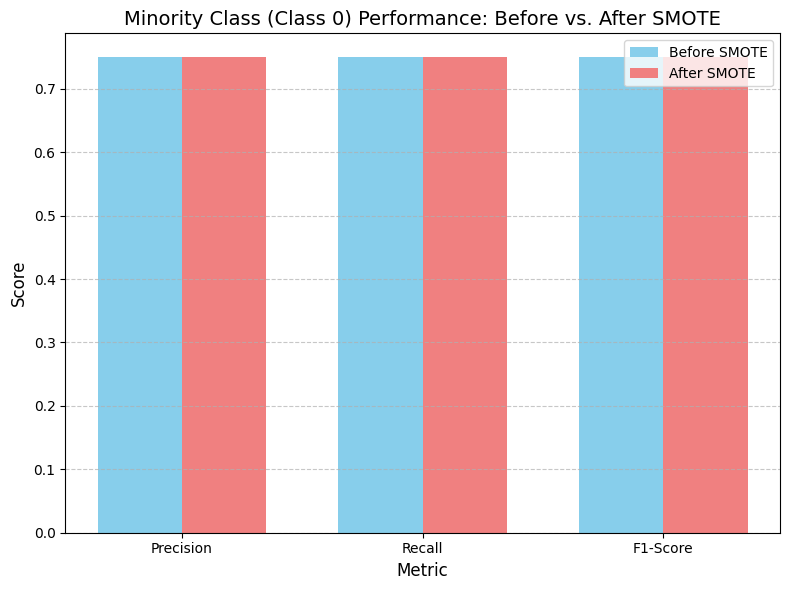

In [10]:
import matplotlib.pyplot as plt
import json

# Generate classification reports as dictionaries
report_before_smote = classification_report(y_test, y_pred_before_smote, output_dict=True)
report_after_smote = classification_report(y_test, y_pred_after_smote, output_dict=True)

# Extract metrics for the minority class (Class 0)
precision_0_before = report_before_smote['0']['precision']
recall_0_before = report_before_smote['0']['recall']
f1_0_before = report_before_smote['0']['f1-score']

precision_0_after = report_after_smote['0']['precision']
recall_0_after = report_after_smote['0']['recall']
f1_0_after = report_after_smote['0']['f1-score']

# Create a DataFrame for comparison
comparison_data = {
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'Before SMOTE': [precision_0_before, recall_0_before, f1_0_before],
    'After SMOTE': [precision_0_after, recall_0_after, f1_0_after]
}
comparison_df = pd.DataFrame(comparison_data)

print("Minority Class (Class 0) Performance Comparison:")
print(comparison_df)

# Plotting the comparison
fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 0.35
index = range(len(comparison_df))

bars_before = ax.bar(index, comparison_df['Before SMOTE'], bar_width, label='Before SMOTE', color='skyblue')
bars_after = ax.bar([i + bar_width for i in index], comparison_df['After SMOTE'], bar_width, label='After SMOTE', color='lightcoral')

ax.set_xlabel('Metric', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Minority Class (Class 0) Performance: Before vs. After SMOTE', fontsize=14)
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(comparison_df['Metric'], rotation=0)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Final Task

### Subtask:
Provide a summary of the findings, explaining how SMOTE impacted the model's performance. Discuss the advantages and potential disadvantages observed in this specific case, and conclude on the overall effectiveness of SMOTE for the given dataset.


## Summary:

### Q&A

1.  **How did SMOTE impact the model's performance?**
    In this specific case, SMOTE did not significantly impact the model's performance. The evaluation metrics (accuracy, precision, recall, and F1-score for both majority and minority classes) remained identical after applying SMOTE, with the Logistic Regression model performing similarly on the test set before and after the technique was used on the training data.

2.  **What were the observed advantages and potential disadvantages in this specific case?**
    *   **Advantages:** No clear advantages were observed in terms of performance metrics in this specific scenario. However, SMOTE successfully balanced the training dataset, preparing it for models that might otherwise struggle with imbalanced data.
    *   **Disadvantages:** In this instance, SMOTE did not provide any discernible improvement in model performance. This indicates an overhead in data preprocessing without yielding direct benefits for the classification task, potentially due to the moderate nature of the initial imbalance and the dataset's characteristics.

3.  **What is the overall effectiveness of SMOTE for the given dataset?**
    For this dataset and the Logistic Regression model used, SMOTE was not effective in improving the model's performance. The original dataset's class imbalance was moderate, and the model already performed reasonably well on both classes, leading to no observable gain from synthesizing minority class samples.

### Data Analysis Key Findings

*   The dataset `Salaries.csv` contains 78 entries and 6 columns (`rank`, `discipline`, `phd`, `service`, `sex`, `salary`).
*   No missing values were identified in the dataset.
*   Outliers in numerical columns (`phd`, `service`, `salary`) were handled by capping values at the 5th and 95th percentiles. For example, `salary` was capped between \$72,284.75 and \$155,767.25.
*   A binary target variable `salary_category` was created, classifying salaries above the median as 'High' (1) and at/below as 'Low' (0).
*   Before SMOTE, the training data showed an imbalance with `salary_category` 0 having 31 samples and `salary_category` 1 having 23 samples.
*   The Logistic Regression model trained on the original data achieved an accuracy of 0.8333, with the minority class (Class 0 - 'Low Salary') showing a precision, recall, and F1-score of 0.75.
*   After applying SMOTE, the training data was balanced, with both `salary_category` 0 and 1 having 31 samples each.
*   The Logistic Regression model trained on the SMOTE-resampled data yielded identical performance metrics on the test set as the model trained before SMOTE: accuracy of 0.8333, and minority class (Class 0) precision, recall, and F1-score of 0.75.

### Insights or Next Steps

*   The lack of improvement after applying SMOTE suggests that the initial class imbalance (23 vs. 31 samples in training) was not severe enough to significantly impact the Logistic Regression model's performance on this particular dataset. For such scenarios, the computational overhead of SMOTE might not be justified.
*   Further investigation could involve testing SMOTE with a more severely imbalanced dataset, different classification models (e.g., tree-based models) that might be more sensitive to class distribution, or exploring alternative oversampling/undersampling techniques to see if they yield different results.
